In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', header = 0)
df.head()

,date,location,task,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,�׭�,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,�׭�,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,�׭�,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,�׭�,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,�׭�,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [3]:
data = df.iloc[:,3:]
data.head()
data[data == 'NR']=0
raw_data = data.to_numpy()
print(raw_data)

[['14' '14' '14' ... '15' '15' '15']
 ['1.8' '1.8' '1.8' ... '1.8' '1.8' '1.8']
 ['0.51' '0.41' '0.39' ... '0.35' '0.36' '0.32']
 ...
 ['36' '55' '72' ... '118' '100' '105']
 ['1.9' '2.4' '1.9' ... '1.5' '2' '2']
 ['0.7' '0.8' '1.8' ... '1.6' '1.8' '2']]


<ipython-input-3-d9c474fca975>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 'NR']=0
D:\Python\envs\pytroch\lib\site-packages\pandas\core\frame.py:3212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [4]:
month_data={}

for month in range(12):
    sample = np.empty([18,480])
    for day in range(20):
        sample[:,day*24:(day + 1)*24] = raw_data[18*(20*month + day):18*(20*month+day +1),:]
    month_data[month] = sample
    
print(month_data)

{0: array([[14.  , 14.  , 14.  , ..., 14.  , 13.  , 13.  ],
       [ 1.8 ,  1.8 ,  1.8 , ...,  1.8 ,  1.8 ,  1.8 ],
       [ 0.51,  0.41,  0.39, ...,  0.34,  0.41,  0.43],
       ...,
       [35.  , 79.  ,  2.4 , ..., 48.  , 63.  , 53.  ],
       [ 1.4 ,  1.8 ,  1.  , ...,  1.1 ,  1.9 ,  1.9 ],
       [ 0.5 ,  0.9 ,  0.6 , ...,  1.2 ,  1.2 ,  1.3 ]]), 1: array([[ 15.  ,  14.  ,  14.  , ...,   8.4 ,   8.  ,   7.6 ],
       [  1.8 ,   1.8 ,   1.7 , ...,   1.7 ,   1.7 ,   1.7 ],
       [  0.27,   0.26,   0.25, ...,   0.36,   0.35,   0.32],
       ...,
       [113.  , 109.  , 104.  , ...,  72.  ,  65.  ,  69.  ],
       [  2.3 ,   2.2 ,   2.6 , ...,   1.9 ,   2.9 ,   1.5 ],
       [  2.5 ,   2.2 ,   2.2 , ...,   0.9 ,   1.6 ,   1.1 ]]), 2: array([[ 18.  ,  18.  ,  18.  , ...,  14.  ,  13.  ,  13.  ],
       [  1.8 ,   1.8 ,   1.8 , ...,   1.8 ,   1.8 ,   1.8 ],
       [  0.39,   0.36,   0.4 , ...,   0.42,   0.47,   0.49],
       ...,
       [103.  , 128.  , 115.  , ...,  60.  ,  94.  ,  53

In [5]:
x = np.empty([12 * 471,18 * 9],dtype = float)
y = np.empty([12 * 471,1], dtype = float)
for month in range(12):
    for hour in range(24):
        if day == 19 and hour > 14:
            continue
        x[month*471+day*24+hour,:] = month_data[month][:,day*24+hour:day*24+hour+9].reshape(1,-1) 
        y[month*471 + day*24 +hour,0] = month_data[month][9,day*24+hour+9]
        
print(x)
print(y)

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 ...
 [17.  18.  19.  ...  1.1  1.4  1.3]
 [18.  19.  18.  ...  1.4  1.3  1.6]
 [19.  18.  17.  ...  1.3  1.6  1.8]]
[[1.09022711e-311]
 [1.09025868e-311]
 [0.00000000e+000]
 ...
 [1.70000000e+001]
 [2.40000000e+001]
 [2.90000000e+001]]


In [6]:
mean_x = np.mean(x,axis=0)
std_x = np.std(x, axis = 0)
for i in range(len(x)):    
    for j in range(len(x[0])):
        if std_x[j] != 0:
            x[i][j] = (x[i][j]-mean_x[j])/std_x[j]
x


array([[-0.17431544, -0.17450617, -0.17463045, ..., -0.15736505,
        -0.15784916, -0.15913238],
       [-0.17431544, -0.17450617, -0.17463045, ..., -0.15736505,
        -0.15784916, -0.15913238],
       [-0.17431544, -0.17450617, -0.17463045, ..., -0.15736505,
        -0.15784916, -0.15913238],
       ...,
       [ 3.9524586 ,  4.15605292,  4.35885476, ...,  2.79486781,
         3.62021746,  3.39047623],
       [ 4.19521001,  4.39663954,  4.12025028, ...,  3.60002223,
         3.35035556,  4.20961668],
       [ 4.43796142,  4.15605292,  3.88164579, ...,  3.33163742,
         4.15994126,  4.75571031]])

In [7]:
import math
x_train_set = x[:math.floor(len(x)*0.8):,:]
y_train_set = y[:math.floor(len(y)*0.8):,:]
x_validation = x[math.floor(len(x)*0.8):,:]
y_validation = y[math.floor(len(y)*0.8):,:]

print(x_train_set)
print(y_train_set)
print(x_validation)
print(y_validation)

[[-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 [-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 [-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 ...
 [-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 [-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 [-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]]
[[1.09022711e-311]
 [1.09025868e-311]
 [0.00000000e+000]
 ...
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]]
[[-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 [-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 [-0.17431544 -0.17450617 -0.17463045 ... -0.15736505 -0.15784916
  -0.15913238]
 ...
 [ 3.9524586   4.15605292  4.35885476 ...  2.79486781  3.62021746
   3.39047623]
 [ 4.19521001  4.39663954  4.12025028 ...  3.60002223  3.35

In [8]:
dim = 18 * 9 + 1
w = np.zeros([dim,1])
x = np.concatenate((np.ones([12*471,1]),x),axis = 1).astype(float)
learning_rate = 100
iter_time = 1000
adagrad = np.zeros([dim,1])
eps = 0.000000000000001
for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x,w)-y,2))/471/12)
    if(t%100 == 0):
        print(str(t)+':'+str(loss))
    gradient = 2 * np.dot(x.transpose(),np.dot(x,w)-y)
    adagrad += gradient ** 2
    w = w - learning_rate*gradient /np.sqrt(adagrad + eps)
np.save('weight.npy', w)    

x

0:5.091710232594796
100:1.4744562294752654
200:1.3493998593586687
300:1.2832801574443498
400:1.2369469399900581
500:1.2012136613745106
600:1.172347262194339
700:1.148365447317692
800:1.1280464440266582
900:1.110569431377968


array([[ 1.        , -0.17431544, -0.17450617, ..., -0.15736505,
        -0.15784916, -0.15913238],
       [ 1.        , -0.17431544, -0.17450617, ..., -0.15736505,
        -0.15784916, -0.15913238],
       [ 1.        , -0.17431544, -0.17450617, ..., -0.15736505,
        -0.15784916, -0.15913238],
       ...,
       [ 1.        ,  3.9524586 ,  4.15605292, ...,  2.79486781,
         3.62021746,  3.39047623],
       [ 1.        ,  4.19521001,  4.39663954, ...,  3.60002223,
         3.35035556,  4.20961668],
       [ 1.        ,  4.43796142,  4.15605292, ...,  3.33163742,
         4.15994126,  4.75571031]])

In [9]:
test_data = pd.read_csv('test.csv',header = None, encoding = 'big5')
test_data = test_data.iloc[:,2:]
test_data[test_data == 'NR'] = 0
test_data = test_data.to_numpy()
test_x = np.empty([240,18*9],dtype = float)
for i in range(240):
    test_x[i,:] = test_data[18 * i:18*(i +1),:].reshape(1,-1)
for i in range(len(test_x)):
    for j in range(len(test_x[0])):
        if std_x[j] != 0:
            test_x[i][j] = (test_x[i][j]-mean_x[j])/std_x[j]
test_x = np.concatenate((np.ones([240,1]),test_x),axis = 1).astype(float)
print(len(test_x))
print(len(test_x[0]))

240
163


In [10]:
w = np.load('weight.npy')
ans_y = np.dot(test_x,w)
ans_y

array([[ 15.03413244],
       [ 23.1930442 ],
       [ 31.6826913 ],
       [ 23.03683485],
       [ 29.89416243],
       [ 23.32555218],
       [ 27.79846366],
       [ 30.76079518],
       [ 22.09748705],
       [ 16.61017075],
       [ 26.34537925],
       [  7.90822035],
       [ 42.23162035],
       [ 41.6285159 ],
       [ 20.07915538],
       [ 13.03591638],
       [ 23.90017866],
       [ 61.55893507],
       [  2.90985588],
       [ 14.05198721],
       [ 38.37937711],
       [ 52.4891168 ],
       [ 12.19793685],
       [ 17.43435199],
       [ 22.3830483 ],
       [ 28.51592925],
       [ 12.34574054],
       [ 72.20173685],
       [ 14.9635924 ],
       [ 43.36892904],
       [ 15.30945225],
       [  7.15940646],
       [  6.63565694],
       [ 30.78202019],
       [ 33.77300763],
       [ 32.97393477],
       [ 33.26204801],
       [ 29.97367498],
       [ 35.91945669],
       [ 33.04336484],
       [ 10.56917449],
       [ 42.35634995],
       [ 28.80458438],
       [ 49

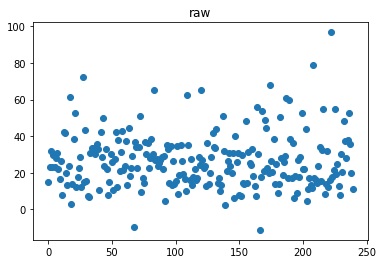

240


In [11]:
import matplotlib.pyplot as plt
plt.title('raw')
plt.scatter(x=range(len(ans_y)),y=ans_y)
plt.show()
print(len(ans_y))

In [12]:
print(np.mean(ans_y))

26.58073170222887
